<a href="https://colab.research.google.com/github/Chaithanya3K/Deep_learning/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
x_test.shape
x_train.shape

(50000, 32, 32, 3)

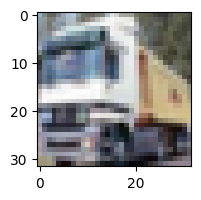

In [4]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,)

In [7]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
classes[1]

'automobile'

In [10]:
def plot_sample(x,y,ind):
  plt.figure(figsize=(15,2));
  plt.imshow(x[ind]);
  plt.xlabel(classes[y[ind]])

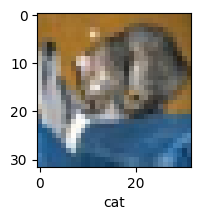

In [11]:
y_test = y_test.reshape(-1,)
plot_sample(x_test,y_test,0)

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
knn=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])
knn.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

knn.fit(x_train,y_train,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2936 - loss: 1.9563
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4053 - loss: 1.6787
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4413 - loss: 1.5847
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4661 - loss: 1.5212
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4796 - loss: 1.4751


In [14]:
knn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4692 - loss: 1.4653


[1.47138512134552, 0.47040000557899475]

#The ANN is performing very poor with accuray of 47,so we will use the cnn to improve the performance of thr model

In [16]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
      layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3876 - loss: 1.6781
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6173 - loss: 1.0945
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6695 - loss: 0.9518
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6996 - loss: 0.8660
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7225 - loss: 0.7975
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7441 - loss: 0.7392
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7675 - loss: 0.6668
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7827 - loss: 0.6252
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7990 - loss: 0.5769
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8105 - loss: 0.5362


In [20]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7008 - loss: 0.9488


[0.9681735634803772, 0.6977999806404114]

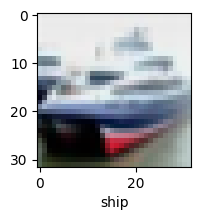

In [21]:
plot_sample(x_test,y_test,1)

In [22]:
y_pred=cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
y_pred[1]

array([2.9664419e-03, 3.0243587e-01, 2.0077231e-07, 2.7694003e-07,
       5.0370670e-07, 6.6656649e-09, 4.8436748e-09, 3.7787050e-08,
       6.9411975e-01, 4.7691364e-04], dtype=float32)

In [25]:
classes[np.argmax(y_pred[1])]

'ship'